In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [71]:
#loading and inspecting the dataframe
loan_data = pd.read_csv('/content/drive/MyDrive/loan_data.csv')
print(loan_data.info())
print(loan_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB
None
                                                Text  Income  Credit_Score  \
0  I need a loan to pay for an international vaca...   26556           581   
1  I want to make home improvements like installi...  197392           389   
2  I need a loan for home renovation, including a...   44561           523   
3  I need funds to buy new furniture and applianc...  190363           729   
4  

In [72]:
#checking for duplicates and missing values

duplicates = loan_data.duplicated()
print(duplicates.value_counts())

missing_values = loan_data.isnull().sum()
print(missing_values)

loan_data.count()

False    24000
Name: count, dtype: int64
Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64


,0
Text,24000
Income,24000
Credit_Score,24000
Loan_Amount,24000
DTI_Ratio,24000
Employment_Status,24000
Approval,24000


In [73]:
#Creating dummy variables for categorical data
loan_data = pd.get_dummies(loan_data, columns=["Employment_Status"])
loan_data.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Approval,Employment_Status_employed,Employment_Status_unemployed
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,Rejected,True,False
1,I want to make home improvements like installi...,197392,389,111604,22.14,Rejected,True,False
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,Rejected,True,False
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,Rejected,False,True
4,I need a loan to start a small business.,61853,732,19210,44.13,Approved,True,False


array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Credit_Score'}>],
       [<Axes: title={'center': 'Loan_Amount'}>,
        <Axes: title={'center': 'DTI_Ratio'}>]], dtype=object)

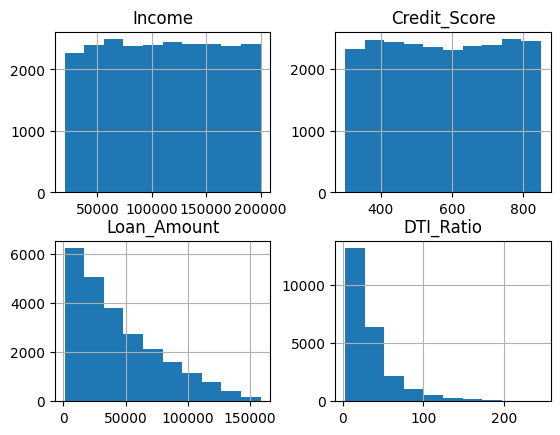

In [74]:
loan_data.hist()

<Axes: >

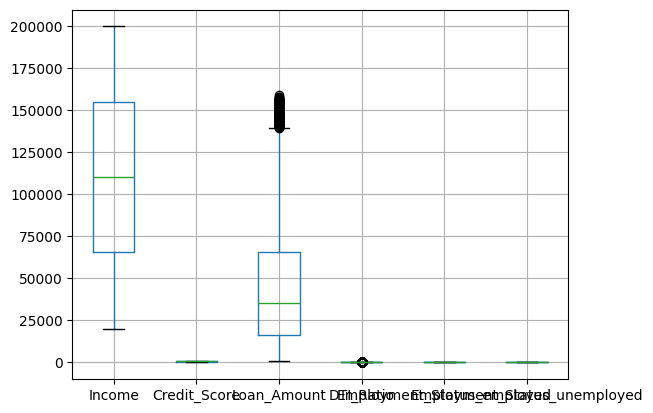

In [75]:
loan_data.boxplot()

In [76]:
loan_data.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


In [77]:
#Normalizing data and splitting data into testing and training data
scaler = MinMaxScaler()
loan_data[['Credit_Score', 'Income', 'Loan_Amount',"DTI_Ratio"]] = scaler.fit_transform(loan_data[['Credit_Score', 'Income', 'Loan_Amount',"DTI_Ratio"]])
loan_data = loan_data.drop('Text', axis=1)

x_train, x_test, y_train, y_test = train_test_split(loan_data.drop("Approval", axis=1), loan_data["Approval"], test_size=0.2, random_state=42)

In [78]:
#Fitting models and compiling classification reports
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print(classification_report(y_test, svm_pred))
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train, y_train)
logistic_pred = logistic_model.predict(x_test)
print(classification_report(y_test, logistic_pred))
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(classification_report(y_test, rf_pred))
voting_model = VotingClassifier(estimators=[('svm', svm_model), ('logistic', logistic_model), ('rf', rf_model)], voting='hard')
voting_model.fit(x_train, y_train)
voting_pred = voting_model.predict(x_test)
print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

    Approved       0.77      0.77      0.77       753
    Rejected       0.96      0.96      0.96      4047

    accuracy                           0.93      4800
   macro avg       0.86      0.86      0.86      4800
weighted avg       0.93      0.93      0.93      4800

              precision    recall  f1-score   support

    Approved       0.77      0.77      0.77       753
    Rejected       0.96      0.96      0.96      4047

    accuracy                           0.93      4800
   macro avg       0.86      0.86      0.86      4800
weighted avg       0.93      0.93      0.93      4800

              precision    recall  f1-score   support

    Approved       0.99      1.00      0.99       753
    Rejected       1.00      1.00      1.00      4047

    accuracy                           1.00      4800
   macro avg       0.99      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800

              preci

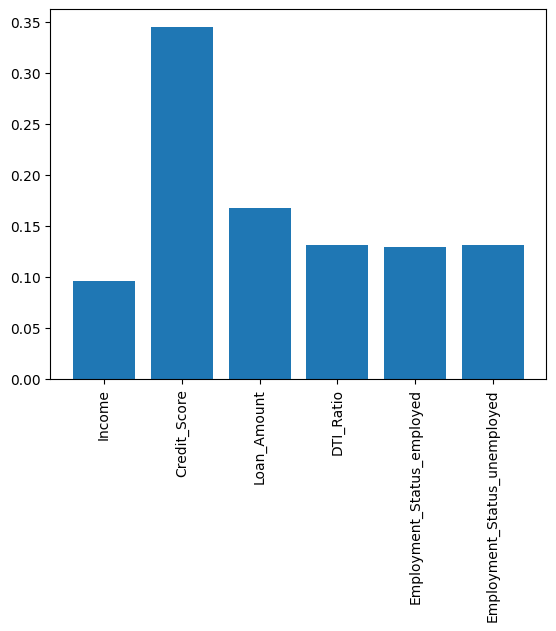

In [79]:
plt.bar(x_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

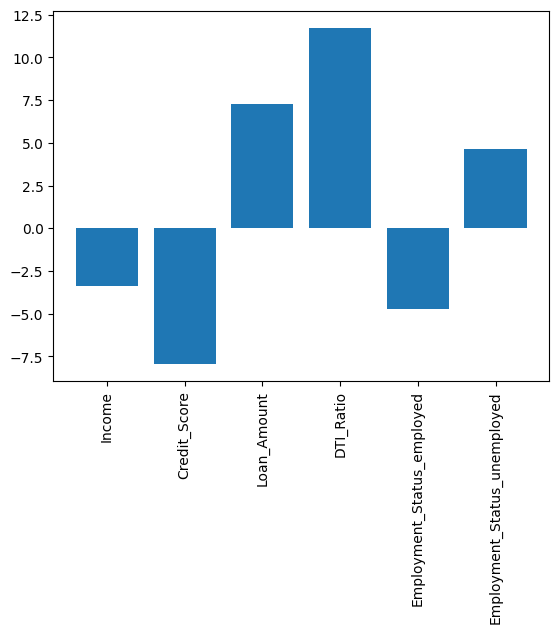

In [80]:
plt.bar(x_train.columns, logistic_model.coef_[0])
plt.xticks(rotation=90)
plt.show()

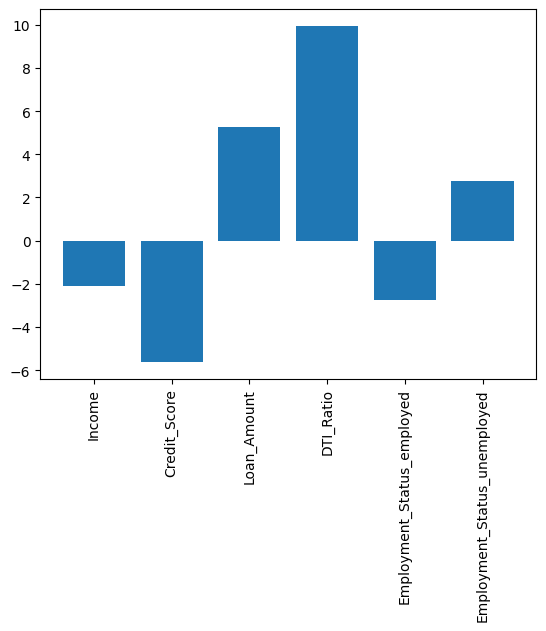

In [81]:
plt.bar(x_train.columns, svm_model.coef_[0])
plt.xticks(rotation=90)
plt.show()

In [82]:
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
voting_confusion_matrix = confusion_matrix(y_test, voting_pred)
print("SVM Confusion Matrix:")
print(svm_confusion_matrix)
print("Logistic Regression Confusion Matrix:")
print(logistic_confusion_matrix)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)
print("Voting Classifier Confusion Matrix:")
print(voting_confusion_matrix)

SVM Confusion Matrix:
[[ 581  172]
 [ 176 3871]]
Logistic Regression Confusion Matrix:
[[ 579  174]
 [ 176 3871]]
Random Forest Confusion Matrix:
[[ 751    2]
 [   9 4038]]
Voting Classifier Confusion Matrix:
[[ 587  166]
 [ 168 3879]]


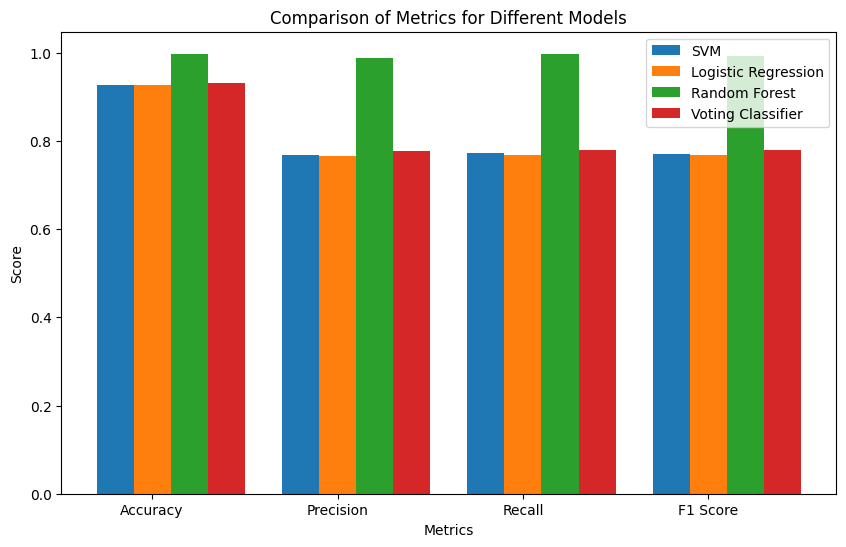

In [83]:

y_test_num = y_test.map({'Approved': 1, 'Rejected': 0})
svm_pred_num = pd.Series(svm_pred).map({'Approved': 1, 'Rejected': 0})
logistic_pred_num = pd.Series(logistic_pred).map({'Approved': 1, 'Rejected': 0})
rf_pred_num = pd.Series(rf_pred).map({'Approved': 1, 'Rejected': 0})
voting_pred_num = pd.Series(voting_pred).map({'Approved': 1, 'Rejected': 0})


svm_accuracy = accuracy_score(y_test_num, svm_pred_num)
logistic_accuracy = accuracy_score(y_test_num, logistic_pred_num)
rf_accuracy = accuracy_score(y_test_num, rf_pred_num)
voting_accuracy = accuracy_score(y_test_num, voting_pred_num)

svm_precision = precision_score(y_test_num, svm_pred_num)
logistic_precision = precision_score(y_test_num, logistic_pred_num)
rf_precision = precision_score(y_test_num, rf_pred_num)
voting_precision = precision_score(y_test_num, voting_pred_num)

svm_recall = recall_score(y_test_num, svm_pred_num)
logistic_recall = recall_score(y_test_num, logistic_pred_num)
rf_recall = recall_score(y_test_num, rf_pred_num)
voting_recall = recall_score(y_test_num, voting_pred_num)

svm_f1 = f1_score(y_test_num, svm_pred_num)
logistic_f1 = f1_score(y_test_num, logistic_pred_num)
rf_f1 = f1_score(y_test_num, rf_pred_num)
voting_f1 = f1_score(y_test_num, voting_pred_num)

svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1]
logistic_metrics = [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1]
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]
voting_metrics = [voting_accuracy, voting_precision, voting_recall, voting_f1]

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

bar_width = 0.2

r1 = np.arange(len(metrics_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, svm_metrics, width=bar_width, label='SVM')
plt.bar(r2, logistic_metrics, width=bar_width, label='Logistic Regression')
plt.bar(r3, rf_metrics, width=bar_width, label='Random Forest')
plt.bar(r4, voting_metrics, width=bar_width, label='Voting Classifier')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Different Models')
plt.xticks([r + bar_width for r in range(len(metrics_labels))], metrics_labels)
plt.legend()
plt.show()

